# [ICTCOG AI Academy] 7기 고급시각저녁반
# Object Detection (4) - One Stage 기법 (1)

- classification
- detection
- segmentation
  - big-data ,  model complexity  <-> high performance
    - 모델이 복잡할수록 성능 향상  
  - small-data
    - transfer Learning  -> overfitting 문제 발생- classification
    - detection
    - segmentation
      - big-data ,  model complexity  <-> high performance
          - 모델이 복잡할수록 성능 향상  
            - small-data
                - transfer Learning  -> overfitting 문제 발생


### data augmentation
- A. Image Transformation
 - tensorflow 구현                                           
    - 1) scalability (확장 가능성)
      - model 일부
      - tf.data.Dataset/ tf.image - > 추가 라이브러리와 연동 가능
    - 2) 추가 라이브러리 (사용 편리)
      - [Augmentor](https://github.com/mdbloice/Augmentor)
      - [albumentations](https://github.com/albumentations-team/albumentations)
      - [imgaug](https://github.com/aleju/imgaug)

- B. deep learning(GAN, VAE,Generative Model)



1. **Image Transformation**
  - 이미지 자체를 규칙에 따라서 변형
  - Numpy, Scipy, Scikit-Image
    - vectorization
  - PIL, OpencV 
    - 쉽게 사용 가능
  - 1) **tensorflow 구현 방법**
    - `tf.keras.preprocessing.image.ImageDataGenerator`
    - `tf.keras.layers.experimental.preprocessing`
      - (1) **모델의 일부로 사용 **
      - (2) **map**

In [1]:
import tensorflow as tf

In [ ]:
shape = (batch_size, height,width,channel)

1. tf.keras.layers.experimental.preprocessing.Resizing
  - 레이어 방식
  - tf.keras.layers.Layer 상속
  - tf.keras.layers.Lambda

2. tf.keras.preprocessing.image
  - PIL 기반 전처리 기능 제공 (CPU만 가능)

3. tf.image
  - 저수준
  - 최적의 성능을 이끌어 낼 수 있음

- higher-order funciton 
- 함수형 패러다임

In [ ]:
map(lambda x:x+1 , [1,2,3,4,5]) #여러개의 데이터를 한번에 변화시킴 #iterables

In [2]:
dir(tf.image) #low level

['ResizeMethod',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'adjust_brightness',
 'adjust_contrast',
 'adjust_gamma',
 'adjust_hue',
 'adjust_jpeg_quality',
 'adjust_saturation',
 'central_crop',
 'combined_non_max_suppression',
 'convert_image_dtype',
 'crop_and_resize',
 'crop_to_bounding_box',
 'decode_and_crop_jpeg',
 'decode_bmp',
 'decode_gif',
 'decode_image',
 'decode_jpeg',
 'decode_png',
 'draw_bounding_boxes',
 'encode_jpeg',
 'encode_png',
 'extract_glimpse',
 'extract_jpeg_shape',
 'extract_patches',
 'flip_left_right',
 'flip_up_down',
 'generate_bounding_box_proposals',
 'grayscale_to_rgb',
 'hsv_to_rgb',
 'image_gradients',
 'is_jpeg',
 'non_max_suppression',
 'non_max_suppression_overlaps',
 'non_max_suppression_padded',
 'non_max_suppression_with_scores',
 'pad_to_bounding_box',
 'per_image_standardization',
 'psnr',
 'random_brightness',
 'random_contrast',
 'random_crop',
 

### [data augmentaiton](https://www.tensorflow.org/tutorials/images/data_augmentation)
- map 하나하나 처리


In [ ]:
data_augmentation = tf.keras.Sequential([  #함수형 패러다임
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    ]) 
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
]) 

1. 가장 일반적으로 사용하는 것 (가장 어려움)
  - tf.keras.layers.Layer 상속 받음
    - 복잡한 상호작용 가능

2. 단순히 이전 레이어 값을 다음 레이어로 값만 변환 (조금 범용적)
  - tf.keras.layers.Lambda

3. 구체적
  - tf.keras.layers.Add, Substarct ...etc


In [ ]:
#함수 정의 :상세하게 변화
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [ ]:
tf.keras.layers.Labmda #범용적

In [ ]:
tf.keras.layers.Subtract #batch size 만큼 받으면 연산, 다음 레이어로 보냄
tf.keras.layers.Add 

In [ ]:
map 한번에 여러개 처리리

In [ ]:
# tf.image 사용 tf.image 사용
#좌우 반전좌우 반전
flipped = tf.image.flip_left_right(image)
#흑백
grayscaled = tf.image.rgb_to_grayscale(image)
#중앙 자르기
cropped = tf.image.central_crop(image, central_fraction=0.5)
flipped = tf.image.flip_left_right(image)
#흑백
grayscaled = tf.image.rgb_to_grayscale(image)

#좌우 반전좌우 반전
flipped = tf.image.flip_left_right(image)
#흑백
grayscaled = tf.image.rgb_to_grayscale(image)
#중앙 자르기
cropped = tf.image.central_crop(image, central_fraction=0.5)
flipped = tf.image.flip_left_right(image)
#흑백
grayscaled = tf.image.rgb_to_grayscale(image)
#중앙 자르기
cropped = tf.image.central_crop(image, central_fraction=0.5)
#90도 회전ropped = tf.image.central_crop(image, central_fraction=0.5)
#90도 회전
rotated = tf.image.rot90(image)
rotated = tf.image.rot90(image)

In [ ]:
#데이터 세트에 직접 적용데이터 세트에 직접 적용
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
      image = (image / 255.0)
        return image, label


        def augment(image,label):
          ''' 함수 만들어서 한번에 전체 전처리''' 
          
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label


def augment(image,label):
  ''' 함수 만들어서 한번에 전체 전처리''' 
  image, label = resize_and_rescale(image, label)
  # Add 6 pixels of padding
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
   # Random crop back to the original size
  image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  image = tf.clip_by_value(image, 0, 1)
  return image, label

- [Augmentor](https://github.com/mdbloice/Augmentor)
  - keras와 직접적 연결
- [albumentations](https://github.com/albumentations-team/albumentations)
  - Numpy data  형태
  - tf.image보다 속도 느림
  - 다양한 기법 지원
  - 다른 augmentation 툴 보다 많이 생성됨
- [imgaug](https://github.com/aleju/imgaug)
  - `load_batch` 지원해서 쉽게 여러가지 이미지로 불러올 수 있음
- [autoaugment](https://github.com/tensorflow/models/tree/master/research/autoaugment)


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir

'/root/.keras/datasets/flower_photos'

In [3]:
!pip install Augmentor

In [4]:
import Augmentor

In [10]:
pipeline= Augmentor.Pipeline(data_dir) #3679장의 이미지가 저장될 위치

Initialised with 3670 image(s) found.
Output directory set to /root/.keras/datasets/flower_photos/output.

In [6]:
data_dir

'/root/.keras/datasets/flower_photos'

In [7]:
pipeline

In [8]:
dir(pipeline) # flip_left_right

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_images',
 '_execute',
 '_execute_with_array',
 '_legal_filters',
 '_populate',
 '_populate_image_arrays',
 '_probability_error_text',
 '_threshold_error_text',
 '_valid_formats',
 'add_further_directory',
 'add_operation',
 'augmentor_images',
 'black_and_white',
 'categorical_labels',
 'class_labels',
 'crop_by_size',
 'crop_centre',
 'crop_random',
 'distinct_dimensions',
 'distinct_formats',
 'flip_left_right',
 'flip_random',
 'flip_top_bottom',
 'gaussian_distortion',
 'generator_threading_tests',
 'generator_threading_tests_with_matrix_data',
 'get_ground_truth_paths',
 'greyscale',
 'ground_tru

In [11]:
pipeline.flip_left_right(0.1 ) # 좌우반전
#pipeline.resize(0.3,100,100)   #
#pipeline.sample(1000)

In [12]:
t=pipeline.keras_generator(32,scaled=False)  # scaled=False 스케일 에러 문제
t #generator

<generator object Pipeline.keras_generator at 0x7ff38cca24d0>

In [13]:
images, labels = next(t)
images

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([array([[[219, 200,   2],
        [217, 198,   0],
        [216, 197,   0],
        ...,
        [ 15,  56,   0],
        [ 15,  56,   0],
        [ 15,  56,   0]],

       [[217, 197,   2],
        [216, 196,   1],
        [215, 195,   0],
        ...,
        [ 14,  55,   0],
        [ 14,  55,   0],
        [ 14,  55,   0]],

       [[216, 196,   3],
        [215, 195,   2],
        [214, 194,   1],
        ...,
        [ 15,  56,   0],
        [ 15,  56,   0],
        [ 15,  56,   0]],

       ...,

       [[ 24,  40,   1],
        [ 22,  40,   0],
        [ 22,  40,   0],
        ...,
        [ 30,  36,   8],
        [ 27,  33,   7],
        [ 26,  30,   7]],

       [[ 24,  40,   1],
        [ 23,  41,   1],
        [ 22,  40,   0],
        ...,
        [ 30,  37,   6],
        [ 28,  34,   6],
        [ 27,  31,   6]],

       [[ 25,  41,   2],
        [ 23,  41,   1],
        [ 22,  40,   0],
        ...,
        [ 30,  37,   4],
        [ 29,  35,   7],
        [ 29,  33

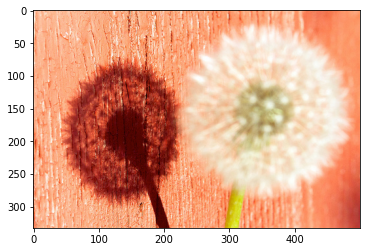

In [59]:
import matplotlib.pyplot as plt
plt.imshow(images[1])

### ImageDataGenerator
- high-level
- augmentation 확인용으로 사용


In [64]:
data_dir

'/root/.keras/datasets/flower_photos'

flow_from_directory 
- 디렉토리에서 하나씩 들어옴

In [15]:
idg=tf.keras.preprocessing.image.ImageDataGenerator( horizontal_flip=True, rescale=1/255) #고수준준
image_data = idg.flow_from_directory(data_dir, target_size= (224,224), batch_size=32)  #target_size 이미지 크기 

Found 6680 images belonging to 6 classes.


In [16]:
image_data #DirectoryIterator -> next()

In [41]:
s=next(image_data)
s[0].shape ,s[1].shape

((32, 224, 224, 3), (32, 6))

In [19]:
s=next(image_data)

In [46]:
vgg=tf.keras.applications.VGG16(include_top=True) #Dense 까지 다 가져옴

In [47]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
vgg.trainable=False

In [22]:
vgg.layers.pop() # pop 해도 바뀌지 않음
len(vgg.layers)

23

In [44]:
vgg2=vgg.layers[:-1]
len(myvgg)

22

In [49]:
model=tf.keras.models.Sequential(vgg2)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [56]:
#vgg=tf.keras.applications.VGG16(include_top=True) 
#vgg.trainable=False
#vgg2=vgg.layers[:-1]
vgg3= vgg2 + [tf.keras.layers.Dense(6, name='P')]
model=tf.keras.models.Sequential(vgg3)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [62]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=['acc'])

데이터가 generator 형태이면 학습시에도 fit_generator 사용
- 이미지를 새로 생성하면서 학습

In [ ]:
model.fit_generator(image_data, epochs=5)  #너무 오래걸려서 멈춤

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
 54/209 [======>.......................] - ETA: 42:36 - loss: 9.8190 - acc: 0.3555

fine-tuning
- trainable True/False 다 가능
- 성능 체크

In [59]:
image_data

In [60]:
#여러 조합
vgg=tf.keras.applications.VGG16(include_top=True) 
for i in vgg.layers[:-5]:
  i.trainable=False
vgg2=vgg.layers[:-1]
vgg3= vgg2 + [tf.keras.layers.Dense(6, name='P')]
model=tf.keras.models.Sequential(vgg3)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [61]:
idg.flow_from_dataframe # 데이터 프레임형태로 가져옴

<bound method ImageDataGenerator.flow_from_dataframe of <tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x7ff38cc7b6d0>>

### YOLO
- You Only Look Once(YOLO)
    - 사람은 한번만 보고 인식
- localization & classification 동시에함
- YOLO 1,2,3  제작에 참여
    - 학습 툴도 제공
      - 쉽게 적용 가능
      - Fast R-CNN 저자도 참여
- 정확도는 낮지만 속도는 6배 빠름
- 실시간 탐지에 적합

#### 과정
1. Resize image
2. Convolutional Network
3. Threshold detections


#### 핵심
-  splitting the image into grid (이미지를 쪼갬)
- confidences : P(object)
  - 각 물체가 있을 확률 X IoU(Intersection over Union)
  - vectorization으로 한번에 계산
- 작은 객체는 탐지를 잘 못함

- selective search 처럼 직사각 형태의 여러 후보군을 생성
  - 각 grid 마다 Confidences 가 큰 값만 남김
    - NMS (non-maximum suppression)
  - 구열별로 어떤 객체 클래스 인지 
  - 조건부 확률  eg. P(Car|Object) : 어떤 객체가 차일 확률
  
- 참고 : https://pjreddie.com/


